In [411]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [412]:
import os
import sys
from PIL import Image
import cv2
import torch 
import torchvision.transforms as transforms 
from PIL import Image 

sys.path.append('..')

from src.data.generate import generate_half_circle_image
from src.data.utils import get_image_paths
from src.data.transforms import RandomDilateTransform, TRAIN_TRANSFORMS, TEST_TRANSFORMS

In [413]:
image_filepath = '../data//other/quick_draw_subset/airplane/airplane_4527275041095680.png'
img = Image.open(image_filepath)
img.size

(128, 128)

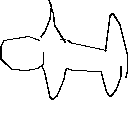

In [414]:
img

In [415]:
images_filepaths = get_image_paths(directory="/Users/alexandrepoupeau/Documents/work/code/halfcircle-clf/data/")

In [416]:
len(images_filepaths)

36200

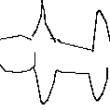

In [417]:
# Read image 
image = Image.open('../data/other/quick_draw_subset/airplane/airplane_4527275041095680.png') 
  
# create an transform for crop the image 
# 300px height and 600px wide 
transform = transforms.RandomResizedCrop(size=110, scale=(0.5, 1.0)) 
  
# use above created transform to crop 
# the image 
image_crop = transform(image) 
  
# display result 
image_crop

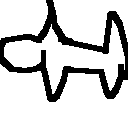

In [418]:
# Read image 
image = Image.open('../data/other/quick_draw_subset/airplane/airplane_4527275041095680.png') 
  
# create an transform for crop the image 
# 300px height and 600px wide 
transform = transforms.Compose([
    transforms.ToTensor(), 
    RandomDilateTransform(min_kernel=3, max_kernel=7, p=1),
    transforms.ToPILImage()
])
  
# use above created transform to crop 
# the image 
image_crop = transform(image) 
  
# display result 
image_crop

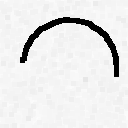

In [494]:
# Read image 
image = Image.open('../data/halfcircle-images/halfcircle_0.png')
# image = Image.open('../data/other/quick_draw_subset/airplane/airplane_4527275041095680.png') 

  
# create an transform for crop the image 
# 300px height and 600px wide 
transform = TRAIN_TRANSFORMS
  
# use above created transform to crop 
# the image 
image_crop = transform(image) 
  
# display result 
transforms.ToPILImage()(image_crop)

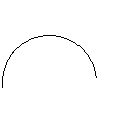

In [462]:
# Read image 
image = Image.open('../data/halfcircle-images/halfcircle_0.png')
# image = Image.open('../data/other/quick_draw_subset/airplane/airplane_4527275041095680.png') 
  
# create an transform for crop the image 
# 300px height and 600px wide 
transform = TEST_TRANSFORMS
  
# use above created transform to crop 
# the image 
image_crop = transform(image) 
  
# display result 
transforms.ToPILImage()(image_crop)

In [421]:
def compute_binary_accuracy(probs, targets, threshold=0.5):
    """
    Computes accuracy for binary classification.
    
    Args:
        probs (torch.Tensor): Tensor of shape (N,) with predicted probabilities.
        targets (torch.Tensor): Tensor of shape (N,) with true labels (0 or 1).
        threshold (float): Decision threshold to classify as 0 or 1.
    
    Returns:
        float: Accuracy percentage.
    """
    # Convert probabilities to binary predictions
    preds = (probs >= threshold).float()  # 1 if prob >= threshold, else 0
    print(preds)
    
    # Compute accuracy
    accuracy = (preds == targets).float().mean().item()  # Convert to percentage
    
    return accuracy

# Example usage:
probs = torch.tensor([0.9, 0.55, 0.6, 0.2, 0.8])  # Predicted probabilities
targets = torch.tensor([1, 0, 1, 0, 1])  # True binary labels

acc = compute_binary_accuracy(probs, targets)
print(f"Binary Classification Accuracy: {acc:.2f}")

tensor([1., 1., 1., 0., 1.])
Binary Classification Accuracy: 0.80
